# Clustering

See our notes on [unsupervised learning](https://jennselby.github.io/MachineLearningCourseNotes/#unsupervised-learning), [K-means](https://jennselby.github.io/MachineLearningCourseNotes/#k-means-clustering), [DBSCAN](https://jennselby.github.io/MachineLearningCourseNotes/#dbscan-clustering), and [clustering validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation).

For documentation of various clustering methods in scikit-learn, see http://scikit-learn.org/stable/modules/clustering.html

The code was based on the example at http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
which has the following comments:

Code source: Gaël Varoquaux<br/>
Modified for documentation by Jaques Grobler<br/>
License: BSD 3 clause

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import datasets

import pandas as pd

In [2]:
# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

FIGURES_PER_ROW = 3 
MAX_CLUSTERS = 6 

In [3]:
def add_plot(figure, subplot_num, subplot_name, data, labels):
    '''Create a new subplot in the figure.'''

    # create a new subplot
    axis = figure.add_subplot(FIGURES_PER_ROW, MAX_CLUSTERS / FIGURES_PER_ROW, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

## Iris Dataset

Before you go on, if you haven't used the iris dataset in a previous assignment, make sure you understand it. Modify the cell below to examine different parts of the dataset that are contained in the iris dictionary object.

What are the features? What are we trying to classify?

In [4]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualization

This is the correct labeling, based on the targets.

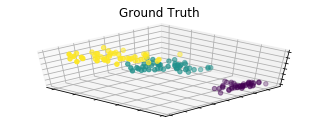

In [6]:
# start a new figure to hold all of the subplots
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))

# Plot the ground truth
add_plot(figure, 1, "Ground Truth", iris_df, iris.target)

## Training and Visualization

Now let's see how k-means clusters the iris dataset, with various different numbers of clusters

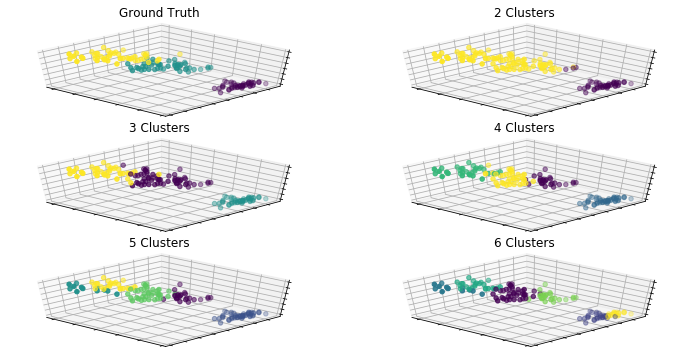

In [7]:
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))
# Plot the ground truth
add_plot(figure, 1, "Ground Truth", iris_df, iris.target)

for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    # get the predictions of which cluster each input is in
    labels = model.labels_

    add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), iris_df, labels.astype(numpy.float))

# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

In [39]:
# your code here
newdata = pd.read_csv('train.csv')
newdata = newdata[newdata['Y']<90]
newdata

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn import preprocessing

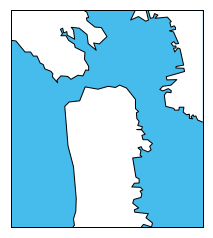

In [42]:
lat = newdata['Y'].values
lon = newdata['X'].values
# determine range to print based on min, max lat and lon of the data
margin = .1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')


# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)


In [44]:
newdata['lons'], newdata['lats'] = lons, lats
scaler = preprocessing.StandardScaler()
newdata['lon_std'], newdata['lat_std'] = scaler.fit_transform(lons.reshape(-1, 1)), scaler.fit_transform(lats.reshape(-1, 1))
sampled_data = newdata.sample(frac=.1)
X = sampled_data[['lon_std','lat_std']].values

sampled_data

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,lons,lats,lon_std,lat_std
813247,2003-11-12 13:30:00,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Wednesday,NORTHERN,NONE,1300 Block of VAN NESS AV,-122.422074,37.788245,21301.340111,25347.215195,0.027240,0.877828
786851,2004-03-21 10:00:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Sunday,PARK,NONE,PIERCE ST / EDDY ST,-122.435617,37.781010,19795.460408,24329.212573,-0.508372,0.578298
599875,2006-11-13 03:45:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Monday,INGLESIDE,PSYCHOPATHIC CASE,MISSION ST / SILVER AV,-122.431295,37.728730,20276.058560,16976.556252,-0.337432,-1.585102
483664,2008-07-23 05:35:00,VANDALISM,MALICIOUS MISCHIEF,Wednesday,CENTRAL,"ARREST, CITED",700 Block of LEAVENWORTH ST,-122.415024,37.787939,22085.328595,25304.043395,0.306089,0.865126
855431,2003-04-18 21:00:00,RUNAWAY,RUNAWAY,Friday,PARK,LOCATED,1200 Block of PAGE ST,-122.441394,37.771727,19153.135089,23023.327377,-0.736834,0.194062
755597,2004-08-20 05:00:00,WARRANTS,ENROUTE TO DEPARTMENT OF CORRECTIONS,Friday,TENDERLOIN,"ARREST, BOOKED",300 Block of LEAVENWORTH ST,-122.414269,37.784208,22169.222581,24779.169021,0.335929,0.710690
739447,2004-11-11 15:28:00,NON-CRIMINAL,FOUND PROPERTY,Thursday,INGLESIDE,NONE,ELLSWORTH ST / CORTLAND AV,-122.414561,37.738881,22136.760124,18403.795223,0.324383,-1.165160
861571,2003-03-21 09:00:00,NON-CRIMINAL,LOST PROPERTY,Friday,SOUTHERN,NONE,HOWARD ST / 4TH ST,-122.402713,37.783260,23454.276011,24645.726270,0.792997,0.671427
807544,2003-12-11 15:00:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Thursday,MISSION,NONE,600 Block of VALENCIA ST,-122.421644,37.763112,21349.178846,21811.532494,0.044255,-0.162489
682729,2005-09-09 06:20:00,ROBBERY,ROBBERY ON THE STREET WITH A DANGEROUS WEAPON,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,23377.307120,23542.895666,0.765621,0.346937


In [54]:

scanner = DBSCAN(eps=.1)
# plot points as red dots
sampled_data['labels'] = scanner.fit_predict(X)

In [55]:
max(lons)
min(lons)

11119.487428467486

In [56]:
sampled_data['labels'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, -1, 11, 12, 13, 14])

b o
g o
r o
c o
m o
y o
k o
b v
g v
r v
c v
m v
y v
k v
b ^
g ^


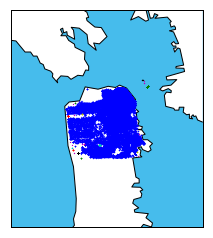

In [59]:
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')

label_array = sampled_data['labels'].unique()
colors = 'bgrcmyk' #7 color values
markers = 'ov^8spP'
def scatterinfo(i):
    
    color_index = (i)%7
    marker_index = int((i-color_index)/7)
    print(colors[color_index], markers[marker_index])
    
    label_data = sampled_data[sampled_data['labels'] == label_array[i]]
    plt.scatter(label_data['lons'].values, label_data['lats'].values,.1, marker = markers[marker_index], color=colors[color_index], zorder=5)
    
    
for i in range(len(label_array)):
    scatterinfo(i)

plt.show()

In [58]:
plt.show()